In [1]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,985 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,953 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packa

In [2]:
# Configure font and text settings
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 16
})

# How Stars move in space

https://www.reddit.com/r/askastronomy/comments/1ccmuum/how_to_find_proper_motion_and_the_parallax_of_a/

http://spiff.rit.edu/classes/ladder/lectures/parallax_example/parallax.html

$$\boxed{
	\begin{aligned}
		\alpha(t) &= \alpha_0 + \mu_\alpha \cdot t + \pi \cdot \cos(2\pi t) \\
		\delta(t) &= \delta_0 + \mu_\delta \cdot t + \pi \cdot \sin(2\pi t) \cdot \sin\epsilon
	\end{aligned}
}$$


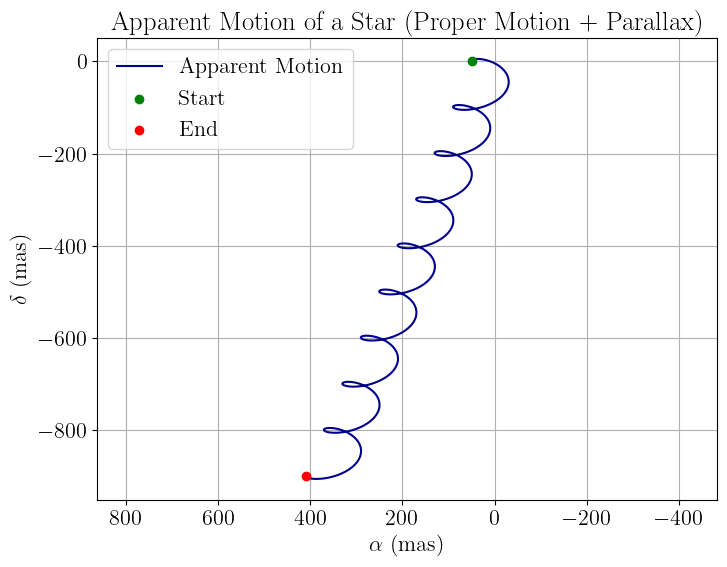

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_ra = 40     # mas/yr
mu_dec = -100      # mas/yr
parallax = 50     # mas
years = 9
steps_per_year = 40
total_steps = years * steps_per_year

# Time array (in years)
t = np.linspace(0, years, total_steps)

# Convert time to radians for Earth's orbit
theta = 2 * np.pi * (t % 1)  # angle of Earth in orbit (yearly cycle)

# Parallax ellipse (simplified):
# Assume Earth’s orbit is circular and star lies in RA=0 direction
# Parallax effect varies sinusoidally over year
parallax_ra = parallax * np.cos(theta)    # RA component
parallax_dec = 0.5 * parallax * np.sin(theta)  # Dec component (arbitrary flattening)

# Proper motion (linear drift)
pm_ra = mu_ra * t
pm_dec = mu_dec * t

# Total apparent motion = proper motion + parallax
ra = pm_ra + parallax_ra
dec = pm_dec + parallax_dec

# Plot
plt.figure(figsize=(8, 6))
plt.plot(ra, dec, label="Apparent Motion", color='darkblue')
plt.scatter(ra[0], dec[0], color='green', label="Start", zorder=5)
plt.scatter(ra[-1], dec[-1], color='red', label="End", zorder=5)

plt.xlabel(r"$\alpha$ (mas)")
plt.ylabel(r"$\delta$ (mas)")
plt.title("Apparent Motion of a Star (Proper Motion + Parallax)")
plt.gca().invert_xaxis()  # Because RA increases to the left on the sky
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


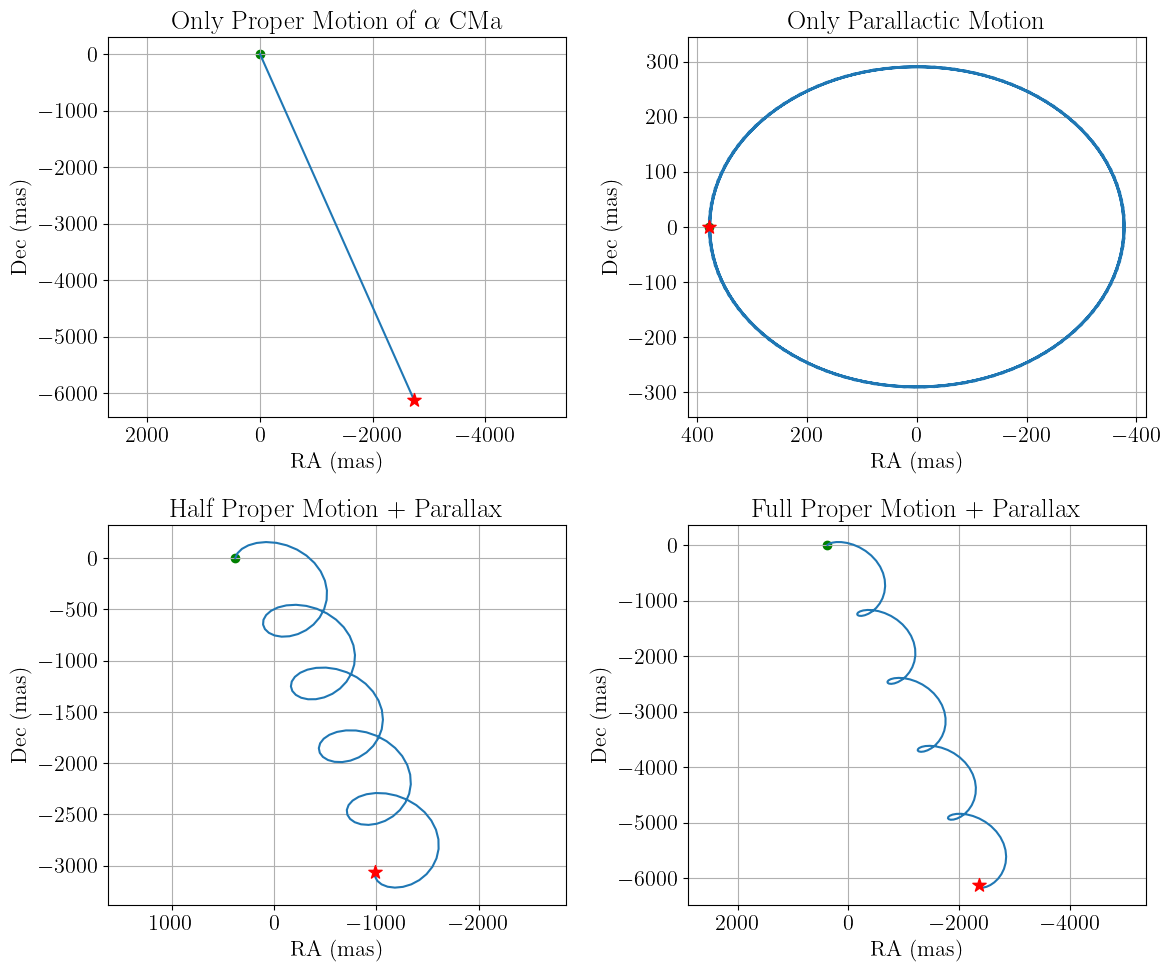

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 16
})

# Time array
years = 5
steps_per_year = 26
t = np.linspace(0, years, years * steps_per_year)
theta = 2 * np.pi * (t % 1)  # Earth's orbital phase

# Sirius A parameters
mu_ra_full = -546.01       # mas/yr
mu_dec_full = -1223.07     # mas/yr
parallax = 379.21          # mas
beta = -39.6               # degrees

# Parallax components
parallax_ra = parallax * np.cos(theta)
parallax_dec = parallax * np.sin(theta) * np.cos(np.radians(beta))

# Proper motion components
pm_ra_full = mu_ra_full * t
pm_dec_full = mu_dec_full * t
pm_ra_half = 0.5 * mu_ra_full * t
pm_dec_half = 0.5 * mu_dec_full * t
pm_ra_zero = np.zeros_like(t)
pm_dec_zero = np.zeros_like(t)

# Scenarios
scenarios = [
    (r"Only Proper Motion of $\alpha$ CMa", pm_ra_full, pm_dec_full, np.zeros_like(t), np.zeros_like(t)),
    ("Only Parallactic Motion", pm_ra_zero, pm_dec_zero, parallax_ra, parallax_dec),
    ("Half Proper Motion + Parallax", pm_ra_half, pm_dec_half, parallax_ra, parallax_dec),
    ("Full Proper Motion + Parallax", pm_ra_full, pm_dec_full, parallax_ra, parallax_dec)
]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, pm_ra, pm_dec, par_ra, par_dec) in zip(axes, scenarios):
    ra = pm_ra + par_ra
    dec = pm_dec + par_dec
    ax.plot(ra, dec, label=title)
    ax.scatter(ra[0], dec[0], color='green', marker='o', label='Start')
    ax.scatter(ra[-1], dec[-1], color='red', marker='*', s=100, label='End', zorder=5)
    ax.set_title(title)
    ax.set_xlabel('RA (mas)')
    ax.set_ylabel('Dec (mas)')
    ax.invert_xaxis()  # RA increases to the left
    ax.grid(True)
    #ax.legend()
    ax.axis('equal')

plt.tight_layout()
plt.savefig('skymotion_sirius.pdf', bbox_inches='tight', format='pdf')
plt.show()


# OWAO 2022: DA 3
# Statistical Parallax



*   Estimate the coordinates of the apex/radiant for the cluster objects.



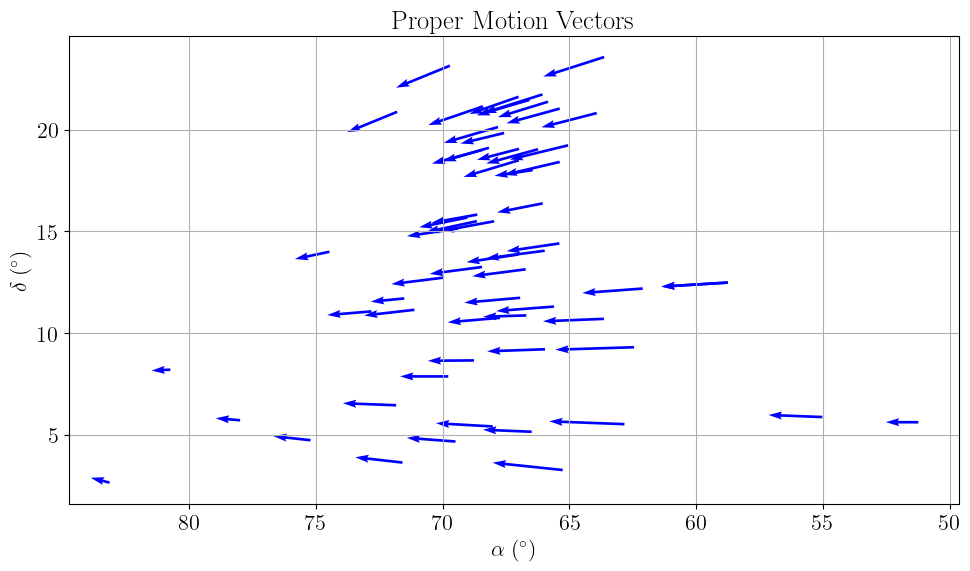

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('/content/statistical_parallax.csv')  # Replace with your actual filename
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

# Convert RA to degrees
df['RA_deg'] = 15 * (df['RA_h'] + df['RA_m'] / 60 + df['RA_s'] / 3600)

# Convert Dec to degrees with proper sign
sign = df['DEC_deg'].apply(lambda x: -1 if x < 0 else 1)
df['Dec_deg'] = sign * (abs(df['DEC_deg']) + df['DEC_m'] / 60 + df['DEC_s'] / 3600)

# Plot quiver
plt.figure(figsize=(10, 6))
plt.quiver(df['RA_deg'], df['Dec_deg'], df['MU_ra'], df['MU_dec'],
           angles='xy', scale_units='xy', scale=50, color='blue', width=0.003)

plt.xlabel(r'$\alpha\; (^\circ)$')
plt.ylabel(r'$\delta \; (^\circ)$')
plt.title('Proper Motion Vectors')
plt.gca().invert_xaxis()  # RA increases to the left in astronomy
plt.grid(True)
plt.tight_layout()
plt.show()


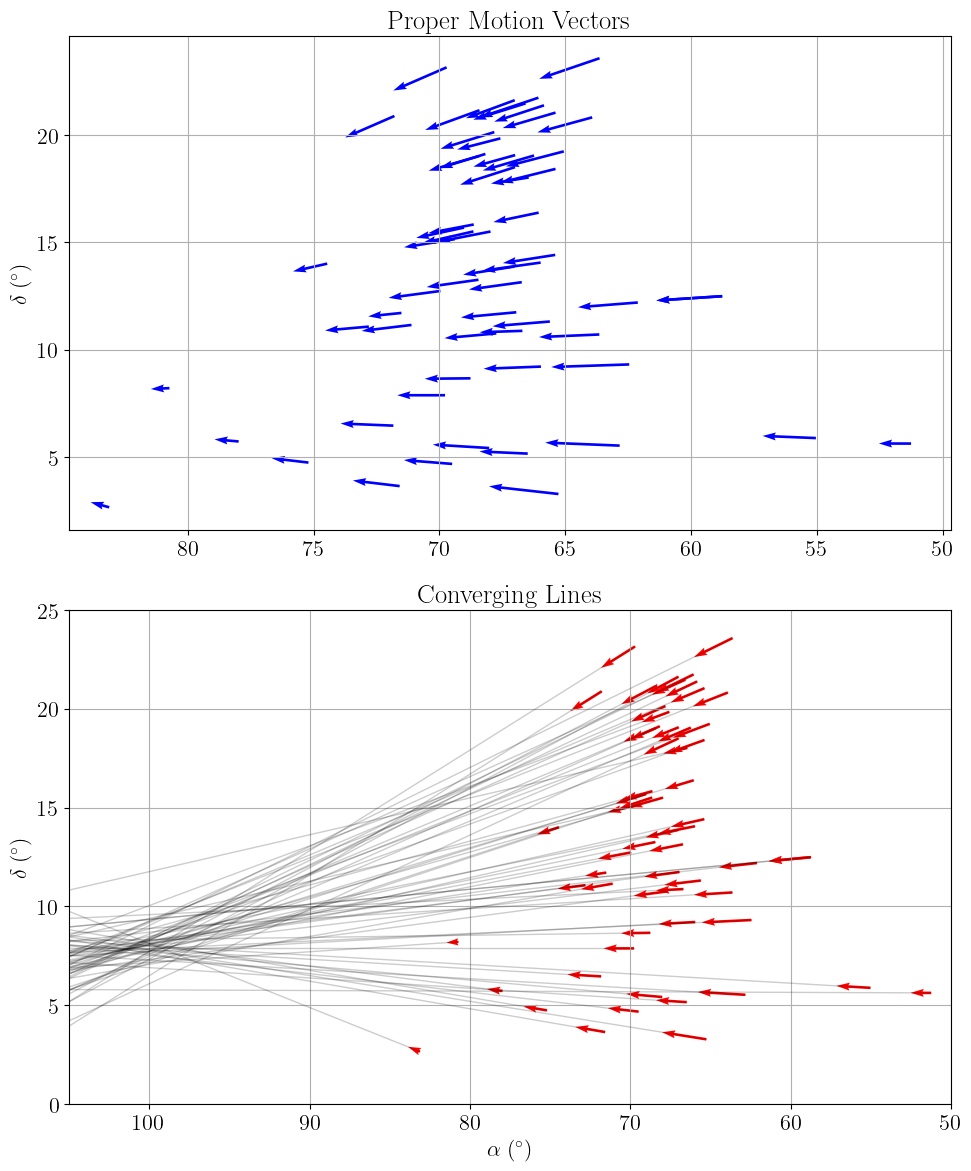

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV
df = pd.read_csv('/content/statistical_parallax.csv')
df.columns = df.columns.str.strip()

# Convert RA to degrees
df['RA_deg'] = 15 * (df['RA_h'] + df['RA_m'] / 60 + df['RA_s'] / 3600)

# Convert Dec to degrees
sign = df['DEC_deg'].apply(lambda x: -1 if x < 0 else 1)
df['Dec_deg'] = sign * (abs(df['DEC_deg']) + df['DEC_m'] / 60 + df['DEC_s'] / 3600)

# Prepare figure with two independent subplots (no sharex)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Top: Quiver plot
ax1.quiver(df['RA_deg'], df['Dec_deg'], df['MU_ra'], df['MU_dec'],
           angles='xy', scale_units='xy', scale=50, color='blue', width=0.003)

ax1.set_ylabel(r'$\delta\; (^\circ)$')
ax1.set_title('Proper Motion Vectors')
ax1.invert_xaxis()
ax1.grid(True)

# --- Bottom: Lines + Quivers
scale = 10  # length multiplier

# Lines
for i, row in df.iterrows():
    x_start = row['RA_deg']
    y_start = row['Dec_deg']
    dx = scale * row['MU_ra']
    dy = scale * row['MU_dec']
    ax2.plot([x_start, x_start + dx], [y_start, y_start + dy], color='black', lw=1, alpha=0.2)

# Quivers
ax2.quiver(df['RA_deg'], df['Dec_deg'], df['MU_ra'], df['MU_dec'],
           angles='xy', scale_units='xy', scale=50, color='red', width=0.003)

ax2.set_xlabel(r'$\alpha\; (^\circ)$')
ax2.set_ylabel(r'$\delta\; (^\circ)$')
ax2.set_title('Converging Lines')
ax2.grid(True)

# Only set x-limits for ax2
ax2.set_xlim(50, 105)  # Adjust as needed
ax2.set_ylim(0, 25)  # Optional: adjust for visibility
ax2.invert_xaxis()

plt.tight_layout()
plt.show()


       RA_deg    Dec_deg  MU_ra  MU_dec    Total_mu
0   66.450000  18.017222     75   -14.0   72.683327
1   66.054167  16.378889     90   -22.0   89.106176
2   67.966667  15.499444    105   -24.0  103.988893
3   68.633333  15.827500     90   -20.0   88.867628
4   66.995833  18.500278    109   -41.0  111.201437
..        ...        ...    ...     ...         ...
56  71.829167   6.453333    105     5.0  104.454430
57  69.491667   4.669722     96     9.0   96.103681
58  71.579167   3.636389     93    13.0   93.718771
59  77.979167   5.716111     48     5.0   48.022330
60  83.125000   2.648333     37    12.0   38.859712

[61 rows x 5 columns]


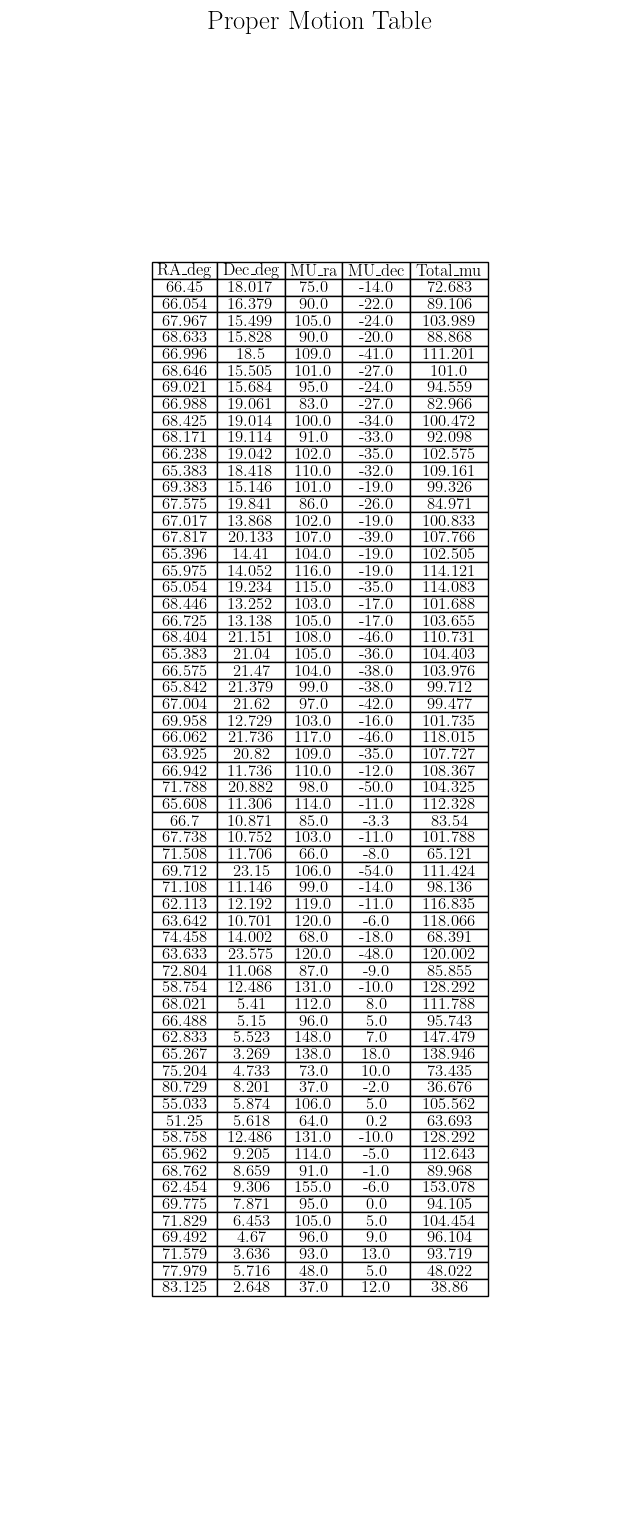

In [33]:
import numpy as np

# Convert Dec_deg to radians
df['Dec_rad'] = np.deg2rad(df['Dec_deg'])

# Calculate total proper motion mu
df['Total_mu'] = np.sqrt(df['MU_dec']**2 + (df['MU_ra'] * np.cos(df['Dec_rad']))**2)

# Display a table with relevant columns
print(df[['RA_deg', 'Dec_deg', 'MU_ra', 'MU_dec', 'Total_mu']])

# Optional: Plot the table using matplotlib
fig, ax = plt.subplots(figsize=(8, len(df) * 0.3 + 1))  # Adjust height by number of rows
ax.axis('off')
table_data = df[['RA_deg', 'Dec_deg', 'MU_ra', 'MU_dec', 'Total_mu']].round(3)
table = ax.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(table_data.columns))))
plt.title('Proper Motion Table')
plt.show()


### Problem 1:

**Determine an expression relating the apparent angular separation $\theta$ between a star and its convergent point, to its transverse velocity $v_{\perp}$ and radial velocity $v_r$.**

---

#### Solution 1:

A star moving in space has a velocity vector $\mathbf{v}$ which can be decomposed into:

* Radial velocity $v_r$, directed along the line of sight (towards or away from observer),
* Transverse velocity $v_\perp$, perpendicular to the line of sight (tangential motion across the sky).

The *convergent point* is the point on the celestial sphere towards which the star cluster is moving. The star's velocity vector points towards this convergent point.

The angle $\theta$ between the star and the convergent point is related to the velocity components as:

$$
\tan \theta = \frac{v_\perp}{v_r}
$$

**Explanation:**

* When you observe a star at angular distance $\theta$ from the convergent point, the transverse velocity $v_\perp$ is the component of the star's velocity perpendicular to the line of sight.
* The radial velocity $v_r$ is the component along the line of sight.
* The ratio of the transverse to radial velocity components gives the tangent of the angular separation $\theta$.

So the expression is:

$$
\boxed{
\tan \theta = \frac{v_\perp}{v_r}
}
$$

---

### Problem 2:

**Express the distance $d$ of a star in terms of its apparent angular separation $\theta$ from its convergent point, its radial velocity $v_r$, and its proper motion $\mu$.**

---

#### Solution 2:

We start from the definition of proper motion and transverse velocity:

* Proper motion $\mu$ is the angular rate of motion across the sky, measured in arcseconds per year (or other angular/time units).
* Transverse velocity $v_\perp$ (in km/s) is related to $\mu$ and distance $d$ (in parsecs) by:

$$
v_\perp = 4.74 \, \mu \, d
$$

where 4.74 is the conversion factor (from arcsec/year and parsecs to km/s).

From Problem 1, we have:

$$
\tan \theta = \frac{v_\perp}{v_r}
\quad \Rightarrow \quad
v_\perp = v_r \tan \theta
$$

Substitute $v_\perp = 4.74 \, \mu \, d$:

$$
4.74 \, \mu \, d = v_r \tan \theta
$$

Solve for $d$:

$$
d = \frac{v_r \tan \theta}{4.74 \, \mu}
$$

---

### Final expression:

$$
\boxed{
d = \frac{v_r \tan \theta}{4.74 \, \mu}
}
$$



Calculate the parallax $\varpi_i$ for each star using:

$$
\varpi_i = \frac{4.74 \mu}{V_r \tan \theta}
$$

where:

* $\mu$ is the total proper motion you calculated,
* $V_r$ is the radial velocity (you need to have this column in your DataFrame, e.g., `V_r`),
* $\theta$ is the angular separation between the star and the solar apex (you will need to calculate or have this column too).

---

### Step 1: Compute $\theta$

Assuming you know the coordinates of the solar apex, say $(\alpha_{apex}, \delta_{apex})$, you can calculate $\theta$ for each star using the spherical law of cosines:

$$
\cos \theta = \sin \delta \sin \delta_{apex} + \cos \delta \cos \delta_{apex} \cos (\alpha - \alpha_{apex})
$$

where $\alpha, \delta$ are the star’s RA and Dec in radians, and $\alpha_{apex}, \delta_{apex}$ are the solar apex coordinates in radians.

---

### Step 2: Calculate $\varpi_i$

Then calculate:

$$
\varpi_i = \frac{4.74 \times \mu}{V_r \times \tan \theta}
$$




### Notes:

* Replace `V_r` with the correct column name in your DataFrame for radial velocity.
* Replace the solar apex coordinates (`alpha_apex_deg`, `delta_apex_deg`) with the values you want.
* You may want to filter out invalid or zero radial velocities and zero or near-zero $\theta$ to avoid division by zero.
* Parallax will be in milliarcseconds (mas) if $\mu$ is in arcseconds/year and $V_r$ is in km/s.




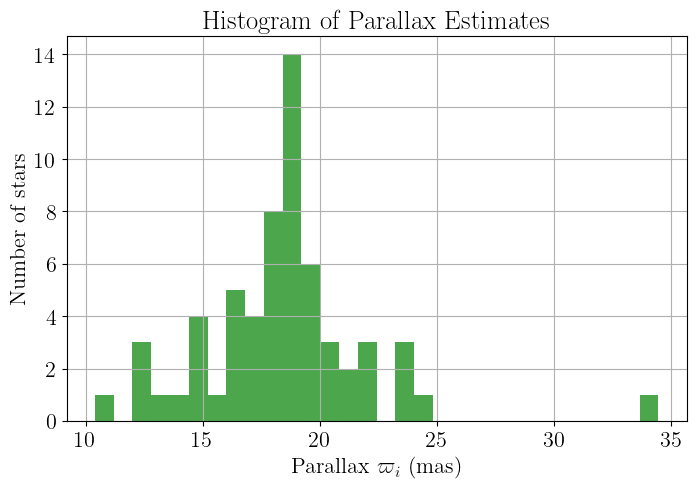

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have radial velocity column 'V_r'
# Replace these with actual apex coordinates in degrees (example values)
alpha_apex_deg = 101.0  # RA of solar apex in degrees
delta_apex_deg = 8.0   # Dec of solar apex in degrees

# Convert angles to radians
alpha_apex = np.deg2rad(alpha_apex_deg)
delta_apex = np.deg2rad(delta_apex_deg)
df['RA_rad'] = np.deg2rad(df['RA_deg'])
df['Dec_rad'] = np.deg2rad(df['Dec_deg'])

# Calculate cosine of theta using spherical law of cosines
cos_theta = (np.sin(df['Dec_rad']) * np.sin(delta_apex) +
             np.cos(df['Dec_rad']) * np.cos(delta_apex) *
             np.cos(df['RA_rad'] - alpha_apex))

# To avoid domain errors due to floating point precision, clip cos_theta between -1 and 1
cos_theta = np.clip(cos_theta, -1, 1)

# Calculate theta
theta = np.arccos(cos_theta)

# Calculate total proper motion mu if not already done
df['Total_mu'] = np.sqrt(df['MU_dec']**2 + (df['MU_ra'] * np.cos(df['Dec_rad']))**2)

# Calculate parallax varpi_i
# Note: Make sure V_r does not contain zero or NaN to avoid division by zero errors
valid = (df['V_r'] != 0) & (~df['V_r'].isna()) & (theta != 0)

df.loc[valid, 'parallax_mas'] = (4.74 * df.loc[valid, 'Total_mu']) / (df.loc[valid, 'V_r'] * np.tan(theta[valid]))

# Plot histogram of parallax (in milliarcseconds, mas)
plt.figure(figsize=(8, 5))
plt.hist(df['parallax_mas'].dropna(), bins=30, color='green', alpha=0.7)
plt.xlabel(r'Parallax $\varpi_i$ (mas)')
plt.ylabel('Number of stars')
plt.title('Histogram of Parallax Estimates')
plt.grid(True)
plt.show()


In [35]:
# Filter out NaN values in parallax to get valid parallaxes
valid_parallaxes = df['parallax_mas'].dropna()

# Calculate mean parallax (in milliarcseconds)
mean_parallax_mas = valid_parallaxes.mean()

# Convert mean parallax to arcseconds for distance calculation
mean_parallax_arcsec = mean_parallax_mas / 1000

# Calculate distance in parsecs
# distance (pc) = 1 / parallax (arcsec)
mean_distance_pc = 1 / mean_parallax_arcsec if mean_parallax_arcsec != 0 else np.inf

print(f"Mean parallax = {mean_parallax_mas:.4f} mas")
print(f"Corresponding distance = {mean_distance_pc:.2f} parsecs")


Mean parallax = 18.4758 mas
Corresponding distance = 54.12 parsecs


---
### Problem 3:

**Determine which stars do not belong to the cluster.**

---

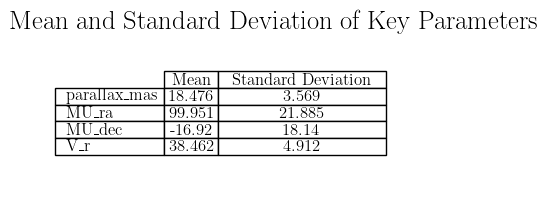

In [36]:
# Select the columns of interest and drop rows with missing values in these columns
cols = ['parallax_mas', 'MU_ra', 'MU_dec', 'V_r']
df_stats = df[cols].dropna()

# Calculate mean and standard deviation for each column
means = df_stats.mean()
stds = df_stats.std()

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': stds
}).round(3)

# Plot table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes

# Create table
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(summary_df.columns))))

plt.title('Mean and Standard Deviation of Key Parameters')
plt.show()

## 🔹 What is a “3-sigma outlier”?

In statistics, the **standard deviation** $\sigma$ measures the **spread** or **dispersion** of a dataset.

* For a normally distributed variable (bell curve), about:

  * 68% of values lie within $\mu \pm 1\sigma$,
  * 95% within $\mu \pm 2\sigma$,
  * **99.7%** within $\mu \pm 3\sigma$.

So, any point that lies **beyond 3 standard deviations** from the mean is very unlikely — only about 0.3% chance — and is thus considered a **statistical outlier**.

---

## 🔹 Step-by-step Mathematical Calculation

Let’s say you have a dataset of values $x_1, x_2, \dots, x_n$ for a parameter (e.g., proper motion in RA).

### 1. **Compute the mean** $\mu$:

$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i
$$

### 2. **Compute the standard deviation** $\sigma$:

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2 }
$$

### 3. **Compute the z-score** for each data point:

The **z-score** tells you how many standard deviations a point is from the mean:

$$
z_i = \frac{x_i - \mu}{\sigma}
$$

* If $|z_i| > 3$, then $x_i$ is considered a **3-sigma outlier**.

---

## 🔹 Multivariate 3σ Filtering in Your Case

You have 4 parameters:

* $\varpi$ (parallax in mas)
* $\mu_\alpha$ (proper motion in RA)
* $\mu_\delta$ (proper motion in Dec)
* $V_r$ (radial velocity)

We apply the same procedure to **each column**:

Let’s denote each parameter as $x_i^{(j)}$, where $j = 1, 2, 3, 4$ for the 4 parameters.

For each star (row), we calculate:

$$
z_i^{(j)} = \frac{x_i^{(j)} - \mu_j}{\sigma_j}
$$

We then check the condition:

$$
\text{If } \left|z_i^{(1)}\right| > 3 \land \left|z_i^{(2)}\right| > 3 \land \left|z_i^{(3)}\right| > 3 \land \left|z_i^{(4)}\right| > 3
\quad \Rightarrow \quad \text{Discard star } i
$$

This means a star is only removed if **it is a 3-sigma outlier in all four parameters simultaneously**, which is very rare and helps to keep most of your data intact while eliminating extreme anomalies.


In [37]:
# Define the columns of interest
cols = ['parallax_mas', 'MU_ra', 'MU_dec', 'V_r']

# Drop rows with missing data in those columns
df_filtered = df[cols].dropna()

# Calculate z-scores for each column
z_scores = (df_filtered - df_filtered.mean()) / df_filtered.std()

# Keep stars that do NOT deviate by more than 3σ in all four parameters
# That means: keep rows where NOT all absolute z-scores are > 3
mask = ~(z_scores.abs() > 3).all(axis=1)

# Apply the mask to the original DataFrame (preserving full data)
df_cleaned = df.loc[df_filtered.index[mask]].copy()

# Optional: Print how many rows were removed
removed = len(df) - len(df_cleaned)
print(f"{removed} stars removed as 3σ outliers in all 4 parameters.")

# Now df_cleaned contains the filtered dataset


0 stars removed as 3σ outliers in all 4 parameters.


### It means in our small data set all stars DO belong to the cluster!!!